In [ ]:
!pip install pmdarima

In [ ]:
!pip install fitter

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.graphics.tsaplots import plot_pacf
# from statsmodels.tsa.arima.model import ARMA
import statsmodels.api as sm
from pylab import rcParams
from datetime import datetime
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Open pit blasting 01-02-2023 000000 To 01-05-2023 235959.csv')

In [ ]:
dfa = df.fillna(0)
dfa['Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)']

0        56.20
1        55.10
2        55.20
3        55.70
4        55.80
         ...  
8638     70.20
8639     70.30
8640      4.20
8641    165.20
8642     42.67
Name: Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb), Length: 8643, dtype: float64

In [ ]:
dfa.isna().sum()

#                                                           0
From                                                        0
To (Interval: 15M)                                          0
Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)       0
Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)      0
Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)         0
Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)        0
Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)          0
Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)         0
Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)        0
Singrauli, Surya Kiran Bhawan Dudhichua  NH3 (µg/m3)        0
Singrauli, Surya Kiran Bhawan Dudhichua  Ozone (µg/m3)      0
Singrauli, Surya Kiran Bhawan Dudhichua  Benzene (µg/m3)    0
dtype: int64

In [ ]:
dfa.rename(columns={'Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)':'PM10 (µg/m3)','Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)':'PM2.5 (µg/m3)','Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)':'NO (µg/m3)','Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)':'NO2 (µg/m3)','Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)':'NOX (ppb)','Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)':'CO (mg/m3)','Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)':'SO2 (µg/m3)','Singrauli, Surya Kiran Bhawan Dudhichua  NH3 (µg/m3)':'NH3 (µg/m3)','Singrauli, Surya Kiran Bhawan Dudhichua  Ozone (µg/m3)':'Ozone (µg/m3)','Singrauli, Surya Kiran Bhawan Dudhichua  Benzene (µg/m3)':'Benzene (µg/m3)'},inplace=True)

In [ ]:
cdf = pd.read_csv('/content/drive/MyDrive/Data Science/Complete_Blasting_info.csv')

In [ ]:
cdf.head()

,Unnamed: 0,PM10 (µg/m3),Time,Date,NO (µg/m3),PM2.5 (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),Ozone (µg/m3),Benzene (µg/m3)
0,0,95.0,00:00:00,2023-02-01,13.801906,35.0,90.1,56.2,0.31,4.564299,17.7,28.1,0.4
1,1,95.0,00:15:00,2023-02-01,13.801906,35.0,88.0,55.1,0.33,4.564299,18.3,27.1,0.4
2,2,95.0,00:30:00,2023-02-01,13.673001,35.0,87.7,55.2,0.38,3.888770,19.7,24.9,0.4
3,3,122.0,00:45:00,2023-02-01,13.273253,34.0,88.9,55.7,0.38,3.803296,21.3,21.9,0.4
4,4,122.0,01:00:00,2023-02-01,12.268943,34.0,90.0,55.8,0.38,-4.859208,22.3,16.7,0.4


In [ ]:
cdf.isna().sum()

Unnamed: 0         0
PM10 (µg/m3)       0
Time               0
Date               0
NO (µg/m3)         0
PM2.5 (µg/m3)      0
NO2 (µg/m3)        0
NOX (ppb)          0
CO (mg/m3)         0
SO2 (µg/m3)        0
NH3 (µg/m3)        0
Ozone (µg/m3)      0
Benzene (µg/m3)    0
dtype: int64

In [ ]:
cdf['Unnamed: 0']

0          0
1          1
2          2
3          3
4          4
        ... 
8635    8635
8636    8636
8637    8637
8638    8638
8639    8639
Name: Unnamed: 0, Length: 8640, dtype: int64

In [ ]:
cdf.rename(columns = {'Unnamed: 0':'Number'}, inplace = True)

In [ ]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Number           8640 non-null   int64  
 1   PM10 (µg/m3)     8640 non-null   float64
 2   Time             8640 non-null   object 
 3   Date             8640 non-null   object 
 4   NO (µg/m3)       8640 non-null   float64
 5   PM2.5 (µg/m3)    8640 non-null   float64
 6   NO2 (µg/m3)      8640 non-null   float64
 7   NOX (ppb)        8640 non-null   float64
 8   CO (mg/m3)       8640 non-null   float64
 9   SO2 (µg/m3)      8640 non-null   float64
 10  NH3 (µg/m3)      8640 non-null   float64
 11  Ozone (µg/m3)    8640 non-null   float64
 12  Benzene (µg/m3)  8640 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 877.6+ KB


Finding the weights for pollution

In [ ]:
cdf.columns

Index(['Number', 'PM10 (µg/m3)', 'Time', 'Date', 'NO (µg/m3)', 'PM2.5 (µg/m3)',
       'NO2 (µg/m3)', 'NOX (ppb)', 'CO (mg/m3)', 'SO2 (µg/m3)', 'NH3 (µg/m3)',
       'Ozone (µg/m3)', 'Benzene (µg/m3)'],
      dtype='object')

#The Time series for Pollution measure

Time Series for AQI

In [ ]:
## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0


In [ ]:
## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0



In [ ]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0



In [ ]:
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0



In [ ]:
## NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0



In [ ]:
## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0


In [ ]:
## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0


In [ ]:

# NO2 Sub-Index calculation
def get_NO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0


In [ ]:

# Benzene Sub-Index calculation
def get_benzene_subindex(x):
    if x <= 5:
        return x
    elif x <= 10:
        return x
    elif x <= 20:
        return 100 + (x - 10) * 100 / 10
    elif x <= 30:
        return 200 + (x - 20) * 100 / 10
    elif x <= 40:
        return 300 + (x - 30) * 100 / 10
    elif x > 40:
        return 400 + (x - 40) * 100 / 10
    else:
        return 0

In [ ]:
def get_NO_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

In [ ]:
cdf['AQI'] = 0

In [ ]:
j=0
for i in range(96, len(cdf)):
  pm10 = get_PM10_subindex(cdf.loc[j:i-1, 'PM10 (µg/m3)'].mean())
  pm25 = get_PM25_subindex(cdf.loc[j:i-1, 'PM2.5 (µg/m3)'].mean())
  nox = get_NOx_subindex(cdf.loc[j:i-1, 'NOX (ppb)' ].mean())
  so2= get_SO2_subindex(cdf.loc[j:i-1, 'SO2 (µg/m3)'].mean())
  nh3 = get_NH3_subindex(cdf.loc[j:i-1, 'NH3 (µg/m3)'].mean())
  co = get_CO_subindex(cdf.loc[i-24:i-1, 'CO (mg/m3)'].max())
  o3 = get_O3_subindex(cdf.loc[i-24:i-1, 'Ozone (µg/m3)'].max())
  no=get_NO_subindex(cdf.loc[j:i-1, 'NO (µg/m3)'].mean())
  benzene=get_benzene_subindex(cdf.loc[j:i-1, 'Benzene (µg/m3)'].mean())
  no2=get_NO2_subindex(cdf.loc[j:i-1, 'NO2 (µg/m3)'].mean())
  cdf['AQI'][i]=max(pm10, pm25, nox, so2, nh3, co, o3, no, benzene, no2)
  j+=1

In [ ]:
hi=cdf[['Time','Date','AQI']]

In [ ]:
hi.loc[hi['AQI']==0]

,Time,Date,AQI
0,00:00:00,2023-02-01,0.0
1,00:15:00,2023-02-01,0.0
2,00:30:00,2023-02-01,0.0
3,00:45:00,2023-02-01,0.0
4,01:00:00,2023-02-01,0.0
...,...,...,...
91,22:45:00,2023-02-01,0.0
92,23:00:00,2023-02-01,0.0
93,23:15:00,2023-02-01,0.0
94,23:30:00,2023-02-01,0.0


Prediction and Forecasting

In [ ]:
idx = int((len(hi)*7)/10)

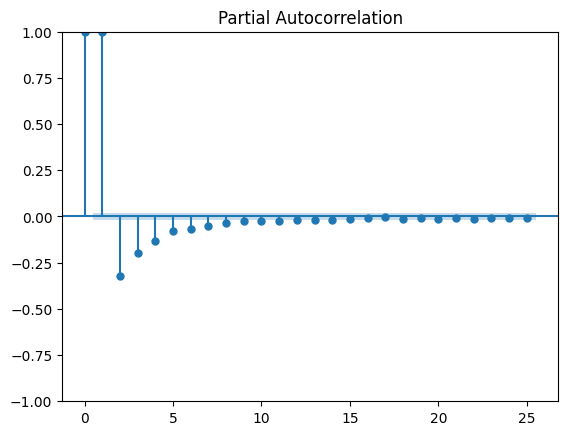

In [ ]:
pacf = plot_pacf(hi['AQI'], lags=25)

In [ ]:
train_data = hi['AQI'][:idx]
test_data = hi['AQI'][idx:]

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(train_data, lags=3).fit()
pred = ar_model.predict(start=len(train_data), end=(len(hi))-1)

In [ ]:
pred.dropna(inplace=True)

In [ ]:
pred

6048    224.501810
6049    221.195383
6050    218.992774
6051    217.426343
6052    216.339181
           ...    
8635    187.474775
8636    187.474672
8637    187.474569
8638    187.474466
8639    187.474363
Length: 2592, dtype: float64

In [ ]:
new_test = test_data[:]

In [ ]:
new_test

6048    219.756944
6049    210.625000
6050    201.493056
6051    192.361111
6052    184.027778
           ...    
8635    111.944985
8636    111.976235
8637    112.010610
8638    112.040818
8639    112.072068
Name: AQI, Length: 2592, dtype: float64

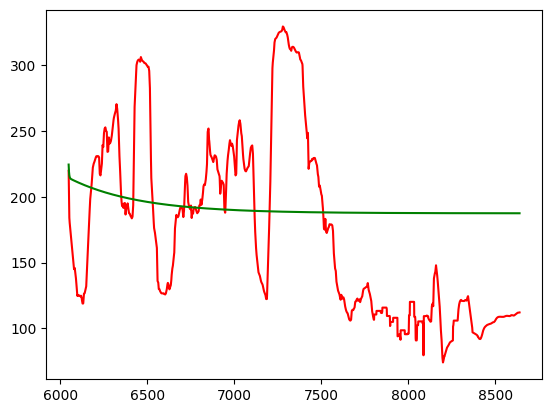

In [ ]:
plt.plot(new_test, color='r', label='Test Data')
plt.plot(pred, color='g', label='Predicted Data')

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(new_test, pred)

-0.034487444999428574

In [ ]:
rrt = hi.copy()

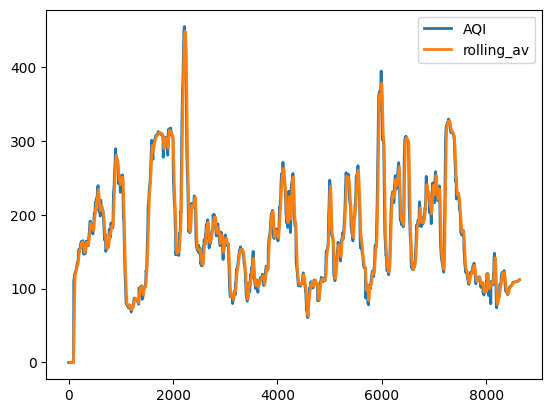

In [ ]:
rrt['rolling_av'] = rrt['AQI'].rolling(24).mean()
# take a look
rrt[['AQI','rolling_av']].plot(lw=2);

In [ ]:
rrt.tail()

,Time,Date,AQI,rolling_av
8635,22:45:00,2023-05-01,111.944985,111.341513
8636,23:00:00,2023-05-01,111.976235,111.415905
8637,23:15:00,2023-05-01,112.010610,111.486999
8638,23:30:00,2023-05-01,112.040818,111.554230
8639,23:45:00,2023-05-01,112.072068,111.618032


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
ARMA_model = ARIMA(endog=rrt['AQI'], order=(0, 0, 10))
results = ARMA_model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                 8640
Model:                ARIMA(0, 0, 10)   Log Likelihood              -22740.461
Date:                Wed, 28 Jun 2023   AIC                          45504.921
Time:                        05:48:47   BIC                          45589.691
Sample:                             0   HQIC                         45533.825
                               - 8640                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        173.1268      1.510    114.686      0.000     170.168     176.086
ma.L1          2.2062      0.002   1213.365      0.000       2.203       2.210
ma.L2          3.5784      0.005    688.900      0.0

In [ ]:
start_date = 6091
end_date   = 8639
test_data = rrt.iloc[6091:8640]['AQI']
rrt['forecast'] = results.predict(start=start_date, end=end_date)

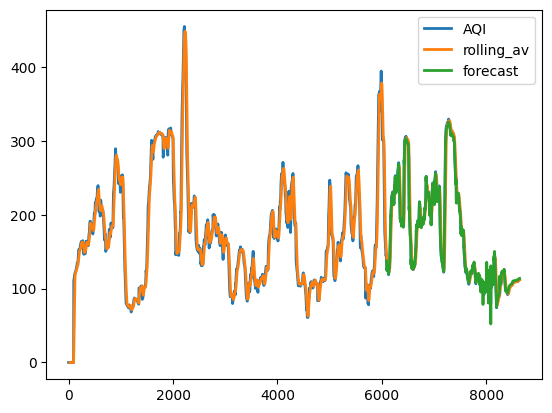

In [ ]:
rrt[['AQI','rolling_av','forecast']].plot(lw=2);

In [ ]:
pred = rrt['forecast'].dropna()

In [ ]:
from sklearn.metrics import r2_score
r2_score(test_data,pred)

0.9984709590734517

In [ ]:
data = cdf[96:]
data.corr()

,Number,PM10 (µg/m3),NO (µg/m3),PM2.5 (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),Ozone (µg/m3),Benzene (µg/m3),AQI
Number,1.000000,-0.064577,-0.016223,-0.063681,-0.174939,-0.188891,0.250753,0.001343,-0.602357,0.119368,-0.203840,-0.118956
PM10 (µg/m3),-0.064577,1.000000,0.300861,0.499552,0.084973,0.341563,0.235919,-0.072964,0.111584,-0.249920,0.359288,0.442107
NO (µg/m3),-0.016223,0.300861,1.000000,0.591319,0.283628,0.791226,0.345686,0.039791,-0.006665,-0.520410,0.120855,0.164927
PM2.5 (µg/m3),-0.063681,0.499552,0.591319,1.000000,0.195618,0.531283,0.405387,-0.016029,0.063298,-0.500822,0.394980,0.364026
NO2 (µg/m3),-0.174939,0.084973,0.283628,0.195618,1.000000,0.723308,-0.059891,0.144465,0.225980,-0.427372,-0.000629,-0.120042
NOX (ppb),-0.188891,0.341563,0.791226,0.531283,0.723308,1.000000,0.209196,0.052422,0.222263,-0.614356,0.245591,0.086210
CO (mg/m3),0.250753,0.235919,0.345686,0.405387,-0.059891,0.209196,1.000000,-0.016008,-0.195087,-0.379636,0.211607,0.006606
SO2 (µg/m3),0.001343,-0.072964,0.039791,-0.016029,0.144465,0.052422,-0.016008,1.000000,-0.142003,0.050661,-0.039402,0.049301
NH3 (µg/m3),-0.602357,0.111584,-0.006665,0.063298,0.225980,0.222263,-0.195087,-0.142003,1.000000,-0.083451,0.104087,-0.020994
Ozone (µg/m3),0.119368,-0.249920,-0.520410,-0.500822,-0.427372,-0.614356,-0.379636,0.050661,-0.083451,1.000000,-0.216711,-0.005225


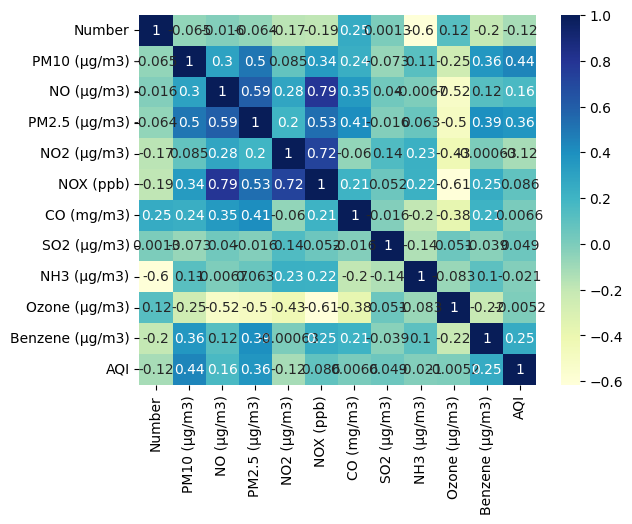

In [ ]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

Text(0, 0.5, 'AQI')

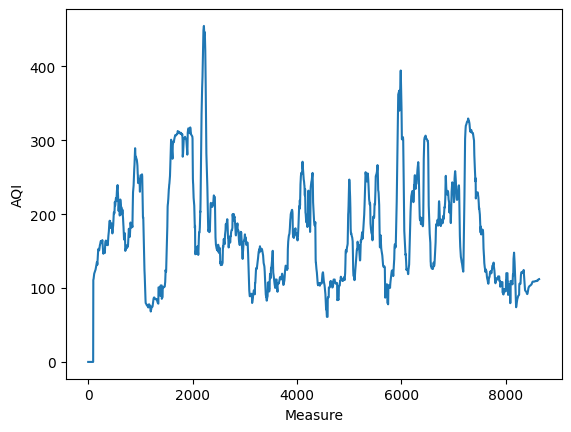

In [ ]:
plt.plot(hi['AQI'])
plt.xlabel('Measure')
plt.ylabel('AQI')

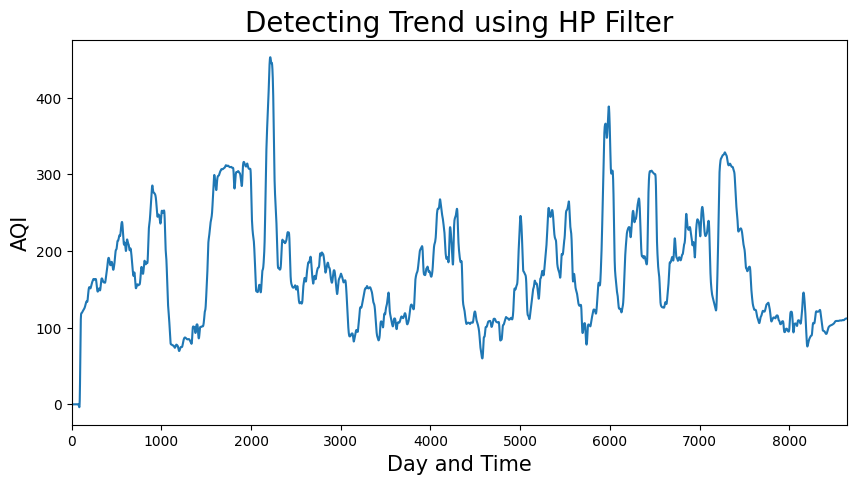

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter
sw_cycle,sw_trend = hpfilter(hi['AQI'], lamb=100)
sw_trend.plot(figsize=(10,5)).autoscale(axis='x',tight=True)
plt.title('Detecting Trend using HP Filter', fontsize=20)
plt.xlabel('Day and Time', fontsize=15)
plt.ylabel('AQI', fontsize=15)
plt.show()

<Figure size 1500x500 with 0 Axes>

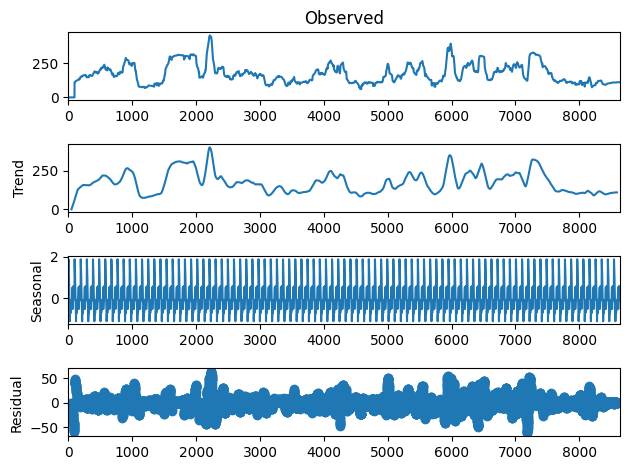

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
tsm_decompose = seasonal_decompose(np.array(hi['AQI']),period=96)
plt.figure(figsize = (15,5))
tsm_plot = tsm_decompose.plot()

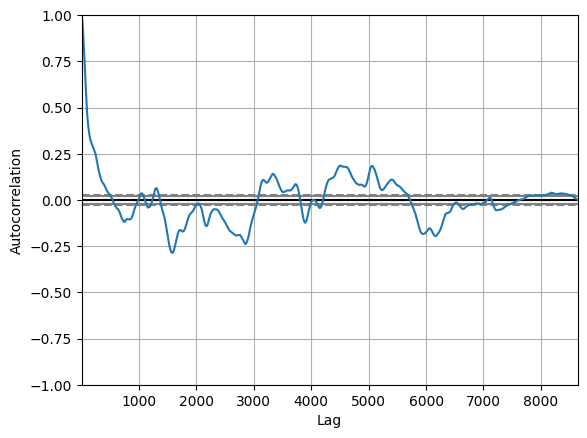

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(hi['AQI'])
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(aqi):
    result = adfuller(aqi)
    labels = ['ADF test statistics', 'P-value', '#Lags used', 'Number of observation used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary')
    else:
        print('Weak evidence against the null hypothesis (Ho), time series has a unit root, indicating it is non stationary. ')


adfuller_test(hi['AQI'])

ADF test statistics : -5.087759564174565
P-value : 1.4835643942896133e-05
#Lags used : 13
Number of observation used : 8626
Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary


In [ ]:
hi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    8640 non-null   object 
 1   Date    8640 non-null   object 
 2   AQI     8640 non-null   float64
dtypes: float64(1), object(2)
memory usage: 202.6+ KB


In [ ]:
cdf.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Number,8640.0,NaN,NaN,NaN,4319.5,2494.297496,0.0,2159.75,4319.5,6479.25,8639.0
PM10 (µg/m3),8640.0,NaN,NaN,NaN,158.752813,132.184736,-35.89962,66.071477,119.0,208.0,847.0
Time,8640,96,00:00:00,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,8640,90,2023-02-01,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NO (µg/m3),8640.0,NaN,NaN,NaN,13.92357,17.86691,0.1,3.9,6.9,15.197892,157.5
PM2.5 (µg/m3),8640.0,NaN,NaN,NaN,74.674591,55.004492,3.0,36.0,59.0,101.0,474.0
NO2 (µg/m3),8640.0,NaN,NaN,NaN,56.119505,20.304624,0.2,39.575,53.8,71.4,106.9
NOX (ppb),8640.0,NaN,NaN,NaN,42.469575,22.144047,4.2,25.1,37.5,53.3,165.2
CO (mg/m3),8640.0,NaN,NaN,NaN,1.39234,0.627626,0.1,0.92,1.39,1.84,4.0
SO2 (µg/m3),8640.0,NaN,NaN,NaN,31.419501,39.601917,-13.445884,12.9,22.3,33.5,645.6


In [ ]:
new_hf = cdf[['Date','PM10 (µg/m3)','NO (µg/m3)','PM2.5 (µg/m3)','NO2 (µg/m3)','NOX (ppb)','CO (mg/m3)','SO2 (µg/m3)','NH3 (µg/m3)','Ozone (µg/m3)','Benzene (µg/m3)','AQI']]

In [ ]:
n_hf = new_hf[96:].groupby(['Date']).mean()

Finding the relationship between AQI and the pollutants

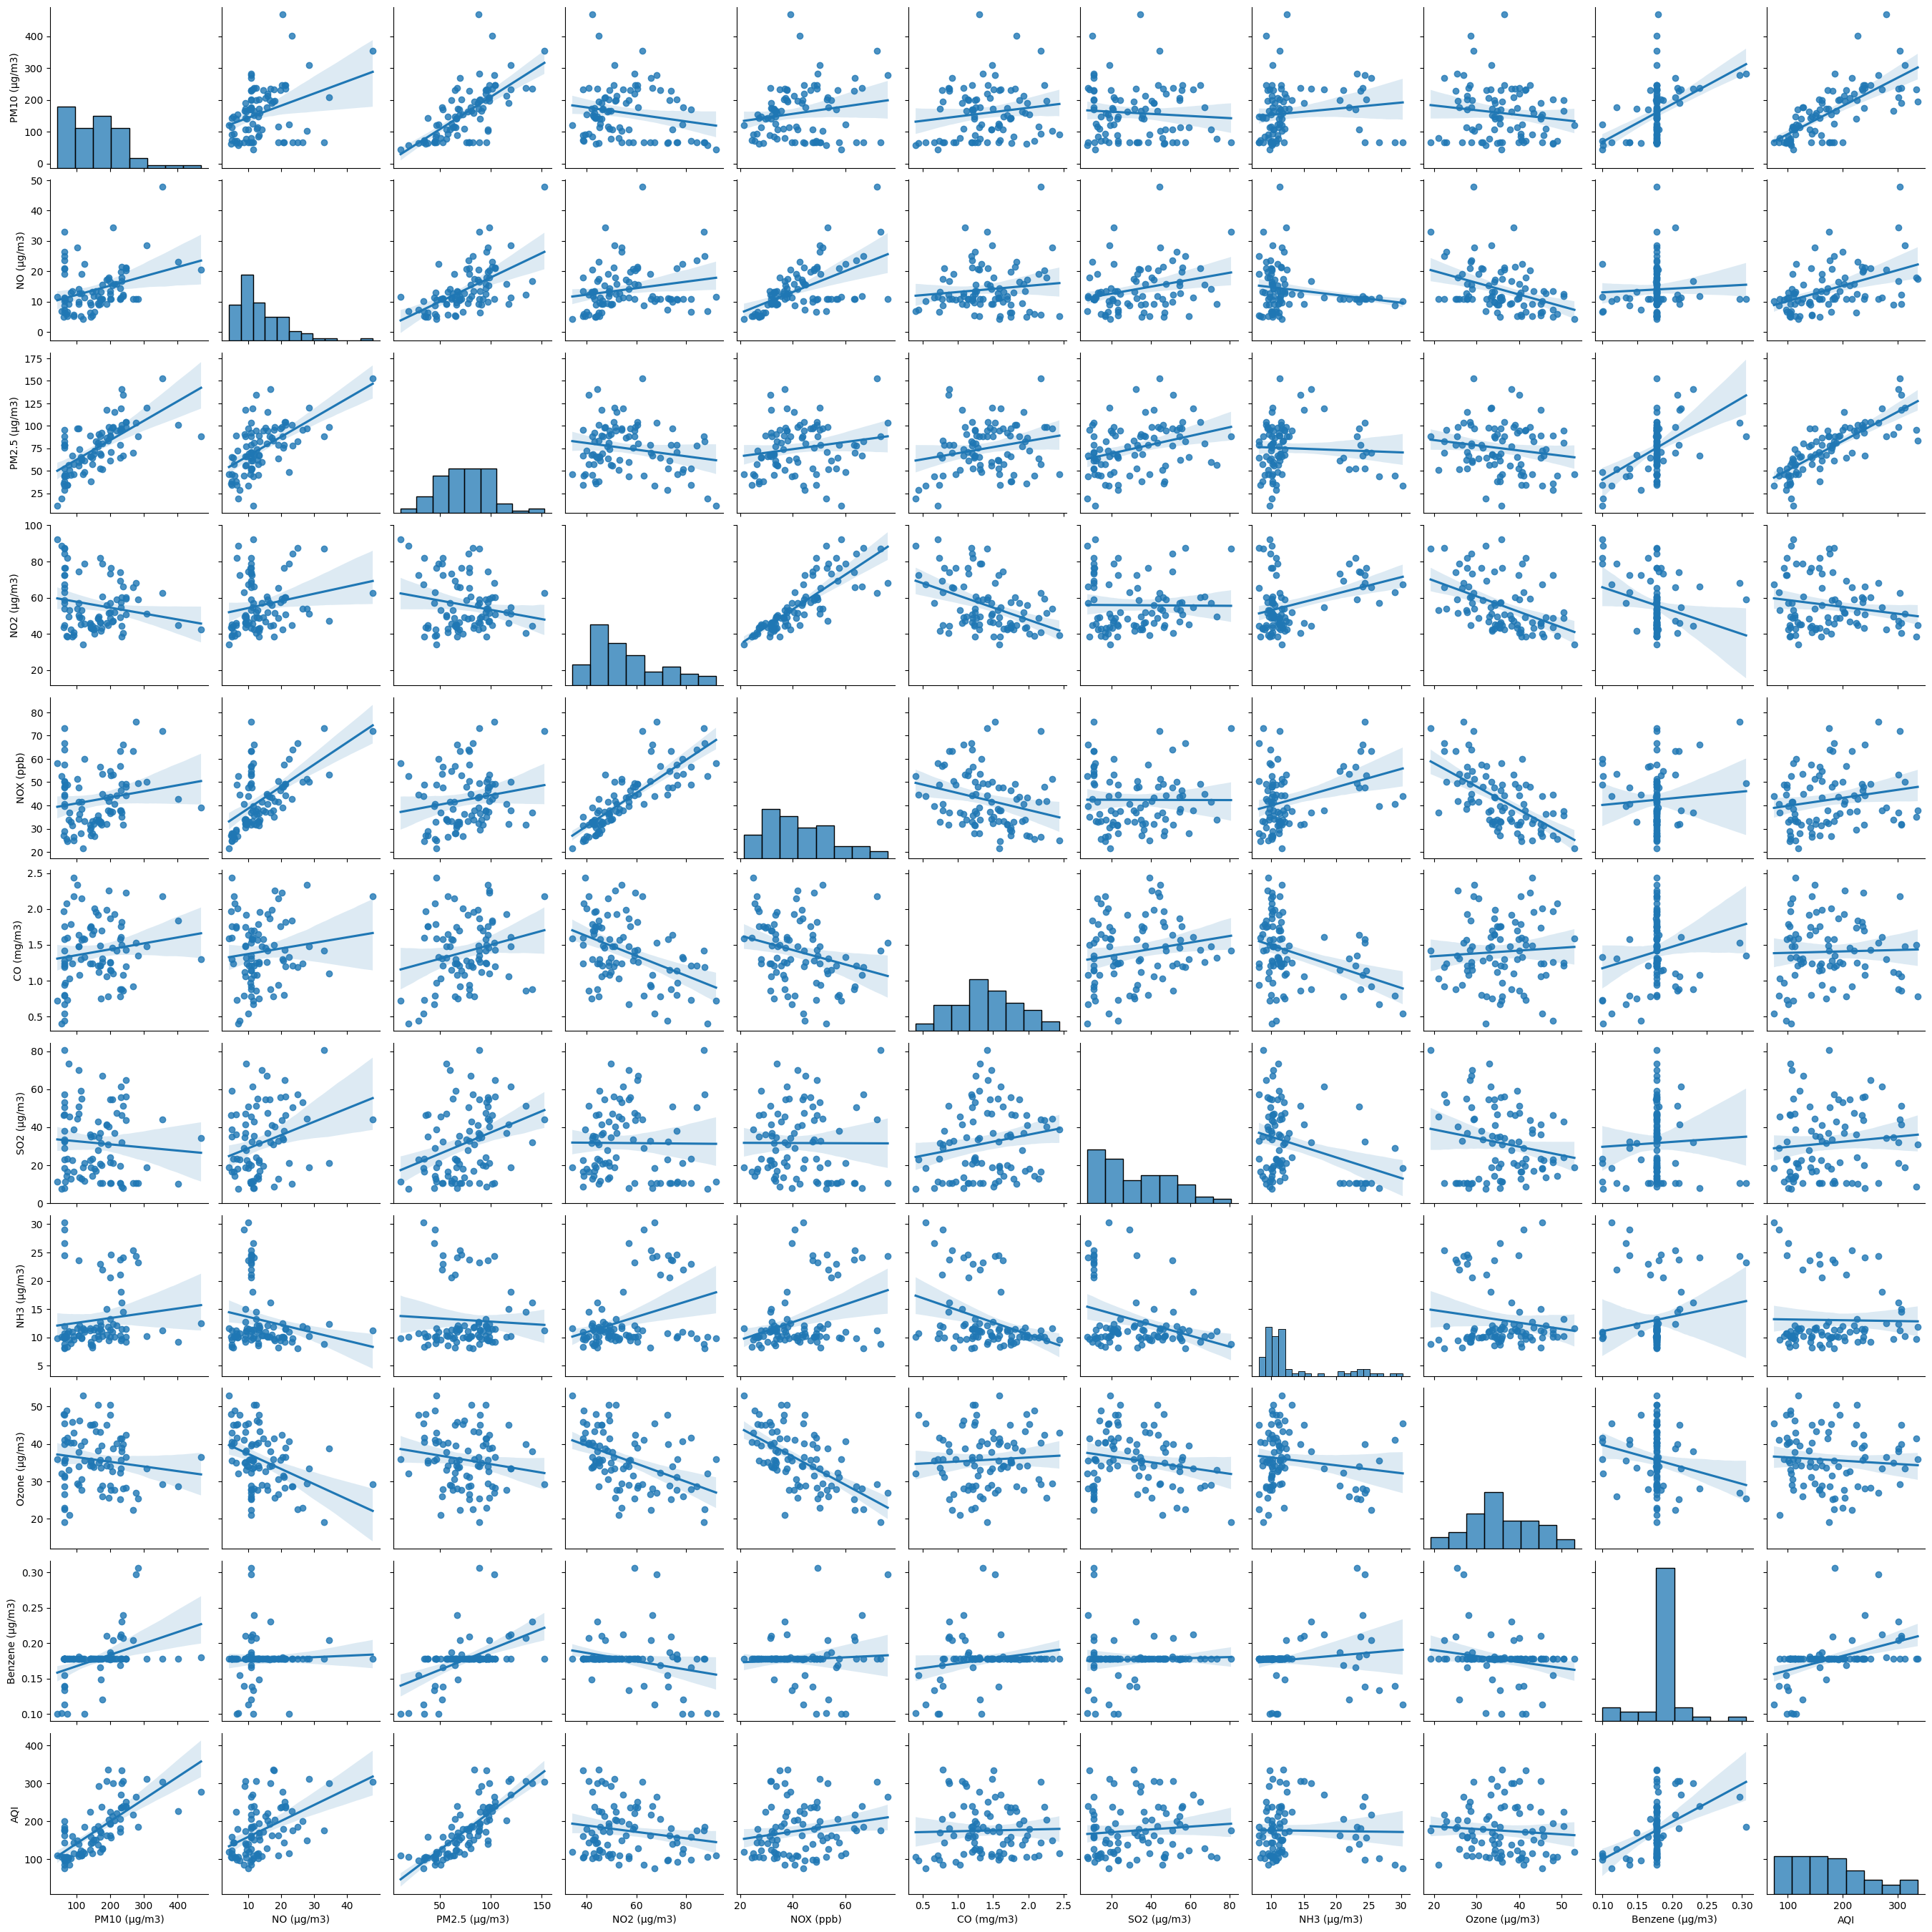

In [ ]:
sns.pairplot(n_hf, kind="reg")
plt.show()

In [ ]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Number           8640 non-null   int64  
 1   PM10 (µg/m3)     8640 non-null   float64
 2   Time             8640 non-null   object 
 3   Date             8640 non-null   object 
 4   NO (µg/m3)       8640 non-null   float64
 5   PM2.5 (µg/m3)    8640 non-null   float64
 6   NO2 (µg/m3)      8640 non-null   float64
 7   NOX (ppb)        8640 non-null   float64
 8   CO (mg/m3)       8640 non-null   float64
 9   SO2 (µg/m3)      8640 non-null   float64
 10  NH3 (µg/m3)      8640 non-null   float64
 11  Ozone (µg/m3)    8640 non-null   float64
 12  Benzene (µg/m3)  8640 non-null   float64
 13  AQI              8640 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 945.1+ KB


In [ ]:
X = n_hf[['PM10 (µg/m3)', 'PM2.5 (µg/m3)','NO2 (µg/m3)','CO (mg/m3)','SO2 (µg/m3)','Ozone (µg/m3)','NO (µg/m3)','NOX (ppb)','NH3 (µg/m3)','Benzene (µg/m3)']]
y = n_hf['AQI']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
predicted_val = regr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, predicted_val)

0.7239713280356752

In [ ]:
regr.coef_

array([  0.21454201,   1.74945267,  -0.67400346, -26.05957512,
        -0.14079884,   1.25148123,  -1.09064549,   1.58353951,
        -1.87413207, -51.41949454])

In [ ]:
regr.intercept_

22.36804265813413

In [ ]:
hi.to_csv(r'/content/drive/MyDrive/Data Science/AQI_val.csv')

In [ ]:
hi.head()

,Time,Date,AQI
0,00:00:00,2023-02-01,0.0
1,00:15:00,2023-02-01,0.0
2,00:30:00,2023-02-01,0.0
3,00:45:00,2023-02-01,0.0
4,01:00:00,2023-02-01,0.0


In [ ]:
t1=hi['Time'][62]
t2=hi['Time'][66]
hi['timestamp'] = pd.to_datetime(hi['Date'] + ' ' + hi['Time'])
hi.set_index('timestamp', inplace=True)
filtered_data = hi.between_time(t1, t2)

filtered_data = filtered_data.set_index(pd.DatetimeIndex(filtered_data.index))

daily_max = filtered_data.resample('D').max()

max_timestamps = filtered_data.loc[filtered_data.groupby(filtered_data.index.date)['AQI'].idxmax()]

In [ ]:
max_timestamps

,Time,Date,AQI
timestamp,,,
2023-02-01 15:30:00,15:30:00,2023-02-01,0.000000
2023-02-02 16:30:00,16:30:00,2023-02-02,133.590278
2023-02-03 15:30:00,15:30:00,2023-02-03,162.708333
2023-02-04 15:30:00,15:30:00,2023-02-04,159.484180
2023-02-05 15:30:00,15:30:00,2023-02-05,187.543840
...,...,...,...
2023-04-27 16:30:00,16:30:00,2023-04-27,86.107612
2023-04-28 16:30:00,16:30:00,2023-04-28,120.861111
2023-04-29 16:30:00,16:30:00,2023-04-29,92.855008


In [ ]:
t3 = hi['Time'].iloc[64]
count = 0
for i in range(len(max_timestamps)):
  if max_timestamps['Time'][i]== t3:
    count+=1

In [ ]:
count

0

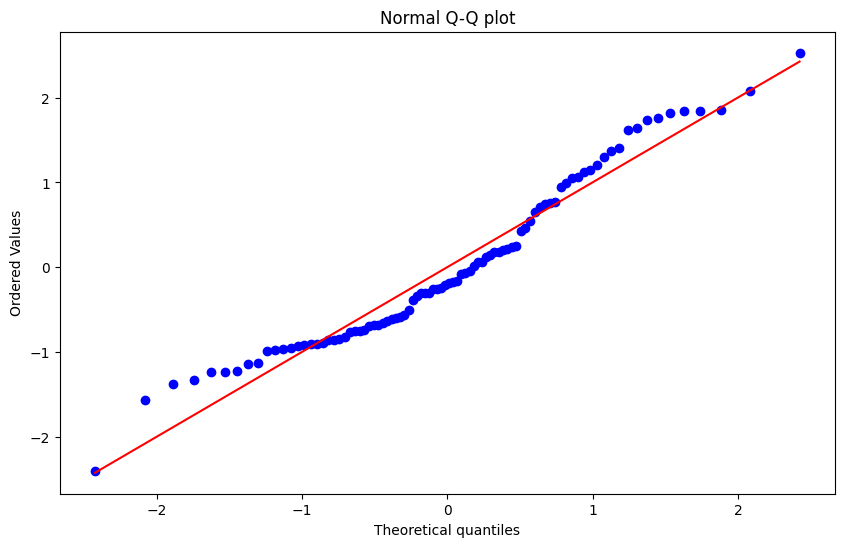

In [ ]:
rcParams['figure.figsize'] = 10, 6
import scipy.stats as stats
n = 90
observation = max_timestamps['AQI']/n

z = (observation-np.mean(observation))/np.std(observation)

stats.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

<Axes: xlabel='AQI', ylabel='Density'>

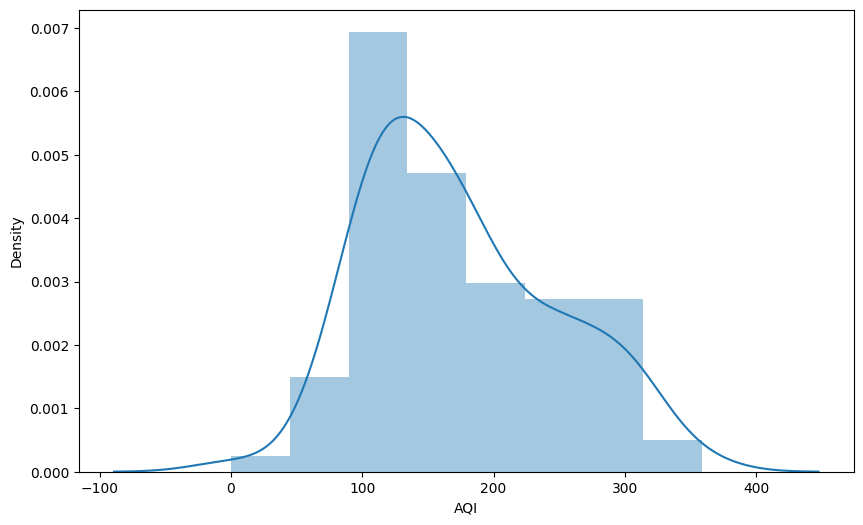

In [ ]:
sns.distplot(max_timestamps['AQI'])

Fitting 110 distributions: 100%|██████████| 110/110 [00:47<00:00,  2.29it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
genhyperbolic,4.188236,438.987547,-253.578662,inf,0.057475,0.910726
skewcauchy,4.189782,468.683392,-262.545063,inf,0.133879,0.072245
pearson3,4.277271,inf,-260.685068,inf,0.064727,0.821446
moyal,4.319552,436.532734,-264.299609,inf,0.080456,0.576829
weibull_min,4.338935,inf,-259.396831,inf,0.074910,0.665320


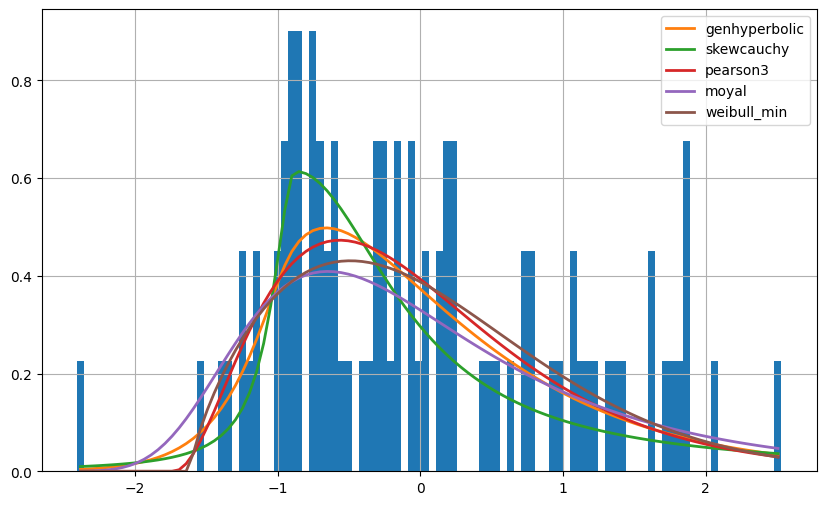

In [ ]:
from fitter import Fitter
f = Fitter(z)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

Across Timestamps

In [ ]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Number           8640 non-null   int64  
 1   PM10 (µg/m3)     8640 non-null   float64
 2   Time             8640 non-null   object 
 3   Date             8640 non-null   object 
 4   NO (µg/m3)       8640 non-null   float64
 5   PM2.5 (µg/m3)    8640 non-null   float64
 6   NO2 (µg/m3)      8640 non-null   float64
 7   NOX (ppb)        8640 non-null   float64
 8   CO (mg/m3)       8640 non-null   float64
 9   SO2 (µg/m3)      8640 non-null   float64
 10  NH3 (µg/m3)      8640 non-null   float64
 11  Ozone (µg/m3)    8640 non-null   float64
 12  Benzene (µg/m3)  8640 non-null   float64
 13  AQI              8640 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 945.1+ KB


In [ ]:
time_dat = cdf[96:].groupby('Time').mean()

In [ ]:
time_dat

,Number,PM10 (µg/m3),NO (µg/m3),PM2.5 (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),Ozone (µg/m3),Benzene (µg/m3),AQI
Time,,,,,,,,,,,,
00:00:00,4320.0,186.514517,16.549121,90.055829,59.987361,47.222310,1.670207,20.124801,13.105015,17.531533,0.187195,175.761010
00:15:00,4321.0,185.256894,16.071022,90.036461,59.701169,47.390573,1.628185,20.037161,13.150820,17.372548,0.186071,176.337105
00:30:00,4322.0,184.852298,16.781753,90.072923,59.989411,48.108192,1.606820,19.486126,13.177213,16.970662,0.187195,176.243751
00:45:00,4323.0,181.514655,17.544708,92.327823,60.017930,48.787338,1.591915,19.200444,13.131144,15.705035,0.190565,176.155524
01:00:00,4324.0,168.936097,18.739633,89.954683,59.898398,49.819099,1.584696,17.856062,12.943957,15.208992,0.189442,176.039124
...,...,...,...,...,...,...,...,...,...,...,...,...
22:45:00,4411.0,202.314288,14.499493,86.131958,61.688745,46.738514,1.634920,21.972417,12.831017,22.804008,0.184947,175.686171
23:00:00,4412.0,184.029040,15.079942,86.021122,62.428713,47.042224,1.631823,21.499144,12.816054,21.517461,0.184947,175.720500
23:15:00,4413.0,179.298032,15.427375,86.021122,61.156603,47.335242,1.638097,20.952683,12.850349,20.473330,0.184947,175.767629


In [ ]:
time_dat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 00:00:00 to 23:45:00
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Number           96 non-null     float64
 1   PM10 (µg/m3)     96 non-null     float64
 2   NO (µg/m3)       96 non-null     float64
 3   PM2.5 (µg/m3)    96 non-null     float64
 4   NO2 (µg/m3)      96 non-null     float64
 5   NOX (ppb)        96 non-null     float64
 6   CO (mg/m3)       96 non-null     float64
 7   SO2 (µg/m3)      96 non-null     float64
 8   NH3 (µg/m3)      96 non-null     float64
 9   Ozone (µg/m3)    96 non-null     float64
 10  Benzene (µg/m3)  96 non-null     float64
 11  AQI              96 non-null     float64
dtypes: float64(12)
memory usage: 9.8+ KB


In [ ]:
len(time_dat)

96

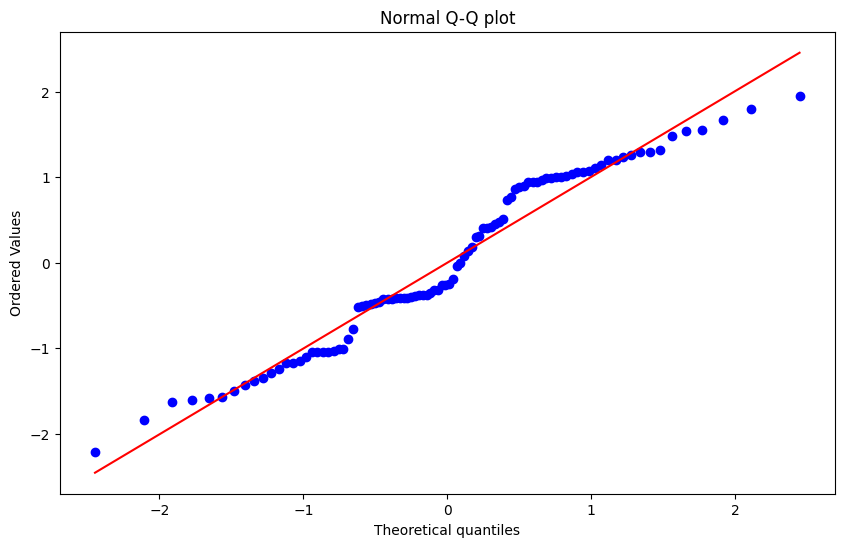

In [ ]:
rcParams['figure.figsize'] = 10, 6
import scipy.stats as stats
n = 96
observation = time_dat['AQI']/n

z = (observation-np.mean(observation))/np.std(observation)

stats.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

<Axes: xlabel='AQI', ylabel='Density'>

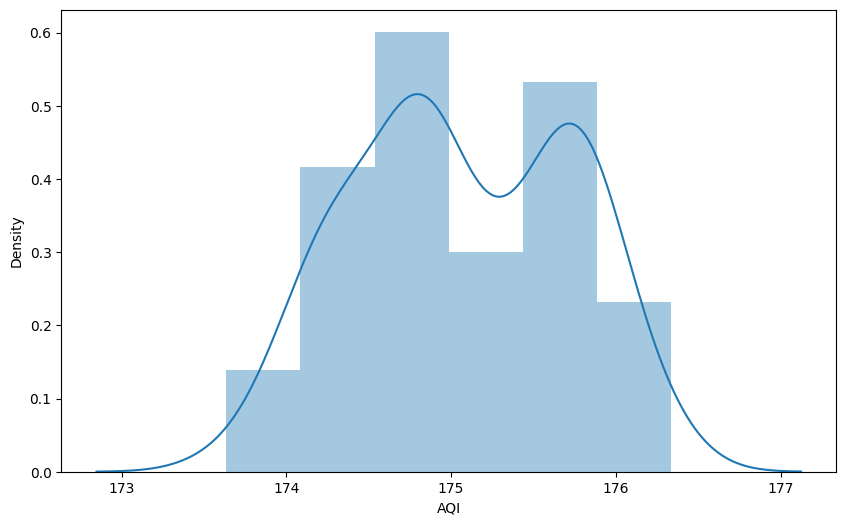

In [ ]:
sns.distplot(time_dat['AQI'])

Fitting 110 distributions: 100%|██████████| 110/110 [01:09<00:00,  1.57it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gennorm,10.176142,327.230211,-201.759968,inf,0.091415,0.375983
dweibull,10.257288,339.051903,-200.997484,inf,0.101563,0.257384
johnsonsb,10.309876,316.725248,-195.942220,inf,0.104463,0.229119
gengamma,10.324528,314.410217,-195.805877,inf,0.123036,0.100379
gausshyper,10.330638,320.888025,-186.620388,inf,0.095928,0.319432


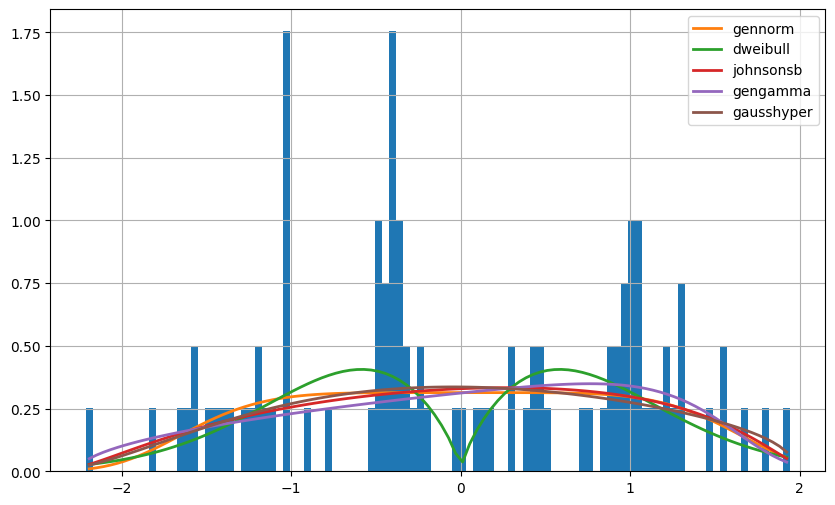

In [ ]:
from fitter import Fitter
f = Fitter(z)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

Text(0, 0.5, 'AQI')

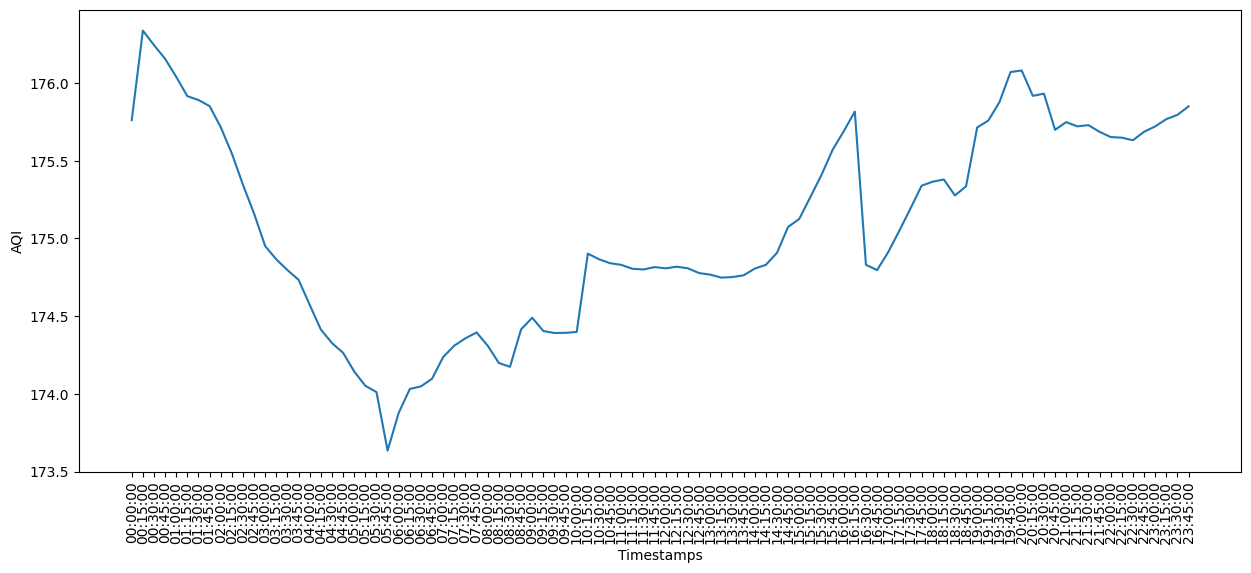

In [ ]:
rcParams['figure.figsize'] = 15, 6
plt.plot(time_dat['AQI'])
plt.xticks(rotation = 90)
plt.xlabel('Timestamps')
plt.ylabel('AQI')

In [ ]:
time_dat

,Number,PM10 (µg/m3),NO (µg/m3),PM2.5 (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),Ozone (µg/m3),Benzene (µg/m3),AQI
Time,,,,,,,,,,,,
00:00:00,4320.0,186.514517,16.549121,90.055829,59.987361,47.222310,1.670207,20.124801,13.105015,17.531533,0.187195,175.761010
00:15:00,4321.0,185.256894,16.071022,90.036461,59.701169,47.390573,1.628185,20.037161,13.150820,17.372548,0.186071,176.337105
00:30:00,4322.0,184.852298,16.781753,90.072923,59.989411,48.108192,1.606820,19.486126,13.177213,16.970662,0.187195,176.243751
00:45:00,4323.0,181.514655,17.544708,92.327823,60.017930,48.787338,1.591915,19.200444,13.131144,15.705035,0.190565,176.155524
01:00:00,4324.0,168.936097,18.739633,89.954683,59.898398,49.819099,1.584696,17.856062,12.943957,15.208992,0.189442,176.039124
...,...,...,...,...,...,...,...,...,...,...,...,...
22:45:00,4411.0,202.314288,14.499493,86.131958,61.688745,46.738514,1.634920,21.972417,12.831017,22.804008,0.184947,175.686171
23:00:00,4412.0,184.029040,15.079942,86.021122,62.428713,47.042224,1.631823,21.499144,12.816054,21.517461,0.184947,175.720500
23:15:00,4413.0,179.298032,15.427375,86.021122,61.156603,47.335242,1.638097,20.952683,12.850349,20.473330,0.184947,175.767629


Text(0, 0.5, 'AQI')

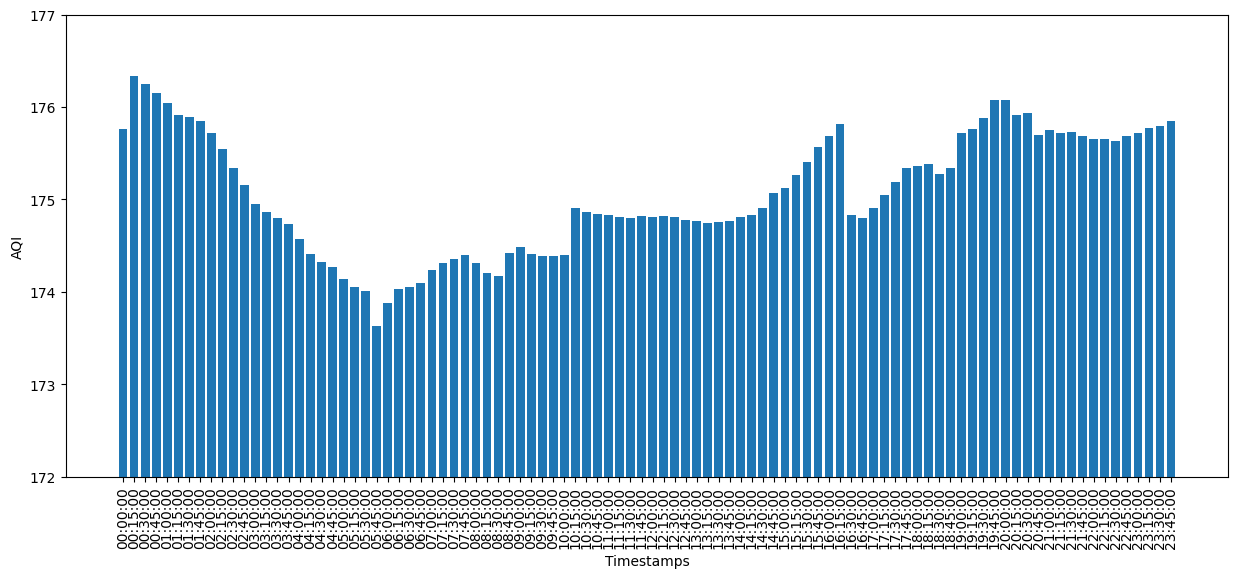

In [ ]:
rcParams['figure.figsize'] = 15, 6
plt.bar(time_dat.index,time_dat['AQI'])
plt.xticks(rotation = 90)
plt.ylim([172,177])
plt.xlabel('Timestamps')
plt.ylabel('AQI')

In [ ]:
Pm2_5 = cdf[96:].groupby('Time').mean()

In [ ]:
Pm2_5

,Number,PM10 (µg/m3),NO (µg/m3),PM2.5 (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),Ozone (µg/m3),Benzene (µg/m3),AQI
Time,,,,,,,,,,,,
00:00:00,4320.0,186.514517,16.549121,90.055829,59.987361,47.222310,1.670207,20.124801,13.105015,17.531533,0.187195,175.761010
00:15:00,4321.0,185.256894,16.071022,90.036461,59.701169,47.390573,1.628185,20.037161,13.150820,17.372548,0.186071,176.337105
00:30:00,4322.0,184.852298,16.781753,90.072923,59.989411,48.108192,1.606820,19.486126,13.177213,16.970662,0.187195,176.243751
00:45:00,4323.0,181.514655,17.544708,92.327823,60.017930,48.787338,1.591915,19.200444,13.131144,15.705035,0.190565,176.155524
01:00:00,4324.0,168.936097,18.739633,89.954683,59.898398,49.819099,1.584696,17.856062,12.943957,15.208992,0.189442,176.039124
...,...,...,...,...,...,...,...,...,...,...,...,...
22:45:00,4411.0,202.314288,14.499493,86.131958,61.688745,46.738514,1.634920,21.972417,12.831017,22.804008,0.184947,175.686171
23:00:00,4412.0,184.029040,15.079942,86.021122,62.428713,47.042224,1.631823,21.499144,12.816054,21.517461,0.184947,175.720500
23:15:00,4413.0,179.298032,15.427375,86.021122,61.156603,47.335242,1.638097,20.952683,12.850349,20.473330,0.184947,175.767629


Text(0, 0.5, 'AQI')

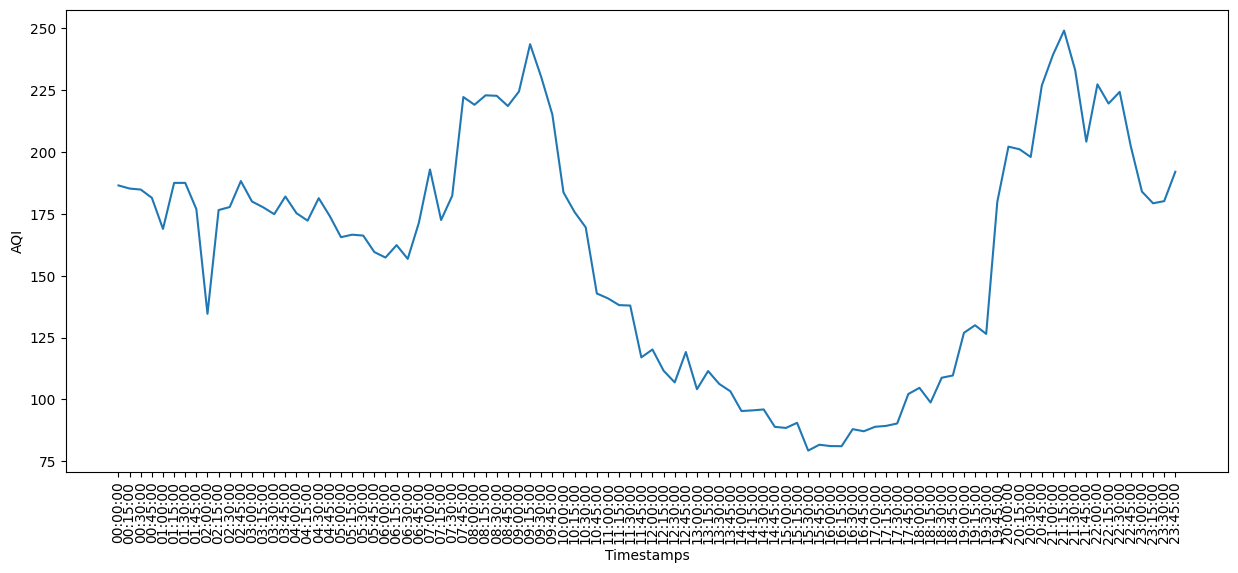

In [ ]:
rcParams['figure.figsize'] = 15, 6
plt.plot(Pm2_5['PM10 (µg/m3)'])
plt.xticks(rotation = 90)
plt.xlabel('Timestamps')
plt.ylabel('AQI')

##Usual working hrs for labourers is from 8am to 6pm.

In [ ]:
hi['Time'][74]

'18:30:00'

In [ ]:
t1=hi['Time'][32]
t2=hi['Time'][74]
hi['timestamp'] = pd.to_datetime(hi['Date'] + ' ' + hi['Time'])
hi.set_index('timestamp', inplace=True)
filtered_data = hi.between_time(t1, t2)

filtered_data = filtered_data.set_index(pd.DatetimeIndex(filtered_data.index))

daily_max = filtered_data.resample('D').max()

max_timestamps11 = filtered_data.loc[filtered_data.groupby(filtered_data.index.date)['AQI'].idxmax()]

In [ ]:
max_timestamps11

,Time,Date,AQI
timestamp,,,
2023-02-01 08:00:00,08:00:00,2023-02-01,0.000000
2023-02-02 17:45:00,17:45:00,2023-02-02,135.083333
2023-02-03 12:45:00,12:45:00,2023-02-03,163.638889
2023-02-04 13:00:00,13:00:00,2023-02-04,164.243056
2023-02-05 08:45:00,08:45:00,2023-02-05,190.673853
...,...,...,...
2023-04-27 18:30:00,18:30:00,2023-04-27,88.172716
2023-04-28 11:45:00,11:45:00,2023-04-28,121.611111
2023-04-29 18:30:00,18:30:00,2023-04-29,96.344591


In [ ]:
print(hi['Time'].iloc[56])
print(hi['Time'].iloc[70])

14:00:00
17:30:00


In [ ]:
# t_init =
t_init = hi['Time'].iloc[56]
t_end = hi['Time'].iloc[70]
max_timestamps11.between_time(t_init, t_end)

,Time,Date,AQI
timestamp,,,
2023-03-11 16:45:00,16:45:00,2023-03-11,119.444444
2023-03-13 15:45:00,15:45:00,2023-03-13,205.833333
2023-03-27 16:45:00,16:45:00,2023-03-27,175.694444
2023-04-02 15:30:00,15:30:00,2023-04-02,123.842451
2023-04-14 15:45:00,15:45:00,2023-04-14,243.047539


##On an average, blast ocurring in the time interval 12:45:00 to 15:15:00 is 5. Therefore, the poisson parameter = 5/89 = 0.05618/day . The probability of atleast one blast during this interval is 0.056179.